In [28]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
import pylab as pl
#from sklearn.metrics import plot_precision_recall_curve

%matplotlib inline

In [29]:
data = pd.read_csv(r"C:\Users\user\Desktop\CSE\CSE(475)(ML)\project\ThoracicSurgery_orig.csv")
data.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [30]:
data[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] = \
(data[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] == 'T').astype(int)

In [31]:
data['DGN'] = data.DGN.str[-1:].astype(int)
data['PRE6'] = data.PRE6.str[-1:].astype(int)
data['PRE14'] = data.PRE14.str[-1:].astype(int)

In [32]:
data = data.drop(['id'], axis=1)

data.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [33]:
col_names = {'DGN': 'Diagnosis', 'PRE4': 'FVC', 'PRE5': 'FEV1', 'PRE6': 'Performance', \
            'PRE7': 'Pain', 'PRE8': 'Haemoptysis', 'PRE9': 'Dyspnoea', 'PRE10': 'Cough', \
            'PRE11': 'Weakness', 'PRE14': 'Tumor_Size', 'PRE17': 'Diabetes_Mellitus', \
            'PRE19': 'MI_6mo', 'PRE25': 'PAD', 'PRE30': 'Smoking', 'PRE32': 'Asthma'}
data = data.rename(index=str, columns=col_names)
data.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


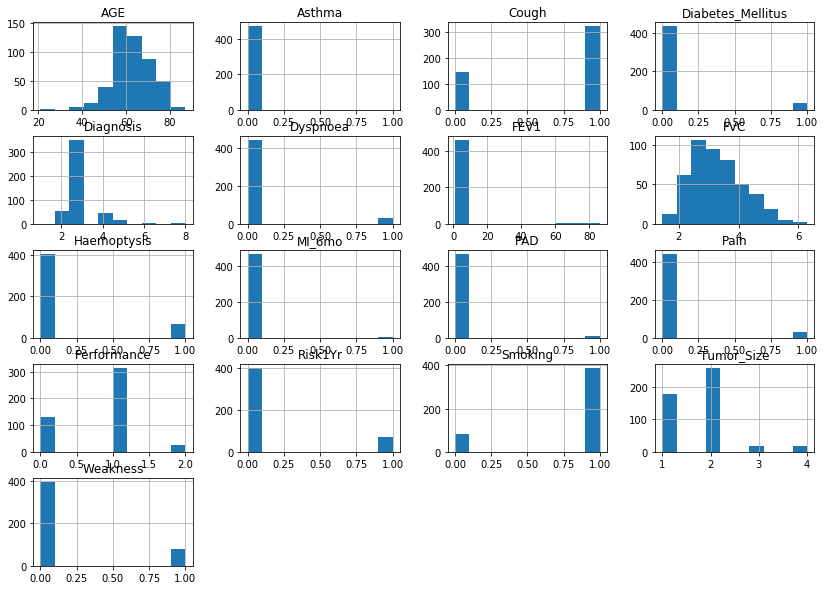

In [34]:
fig=plt.figure(figsize=(14,10))
ax=fig.gca()
data.hist(ax=ax)
plt.show()

In [35]:
data.shape


(470, 17)

In [36]:
data['Risk1Yr'].value_counts()

0    400
1     70
Name: Risk1Yr, dtype: int64

In [37]:
df_majority = data[data.Risk1Yr==0]
df_minority = data[data.Risk1Yr==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=400,    
                                 random_state=123)
 

In [38]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.Risk1Yr.value_counts()

1    400
0    400
Name: Risk1Yr, dtype: int64

In [39]:
features = df_upsampled.columns
features

Index(['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis',
       'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus',
       'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'AGE', 'Risk1Yr'],
      dtype='object')

In [40]:
features = [x for x in features if x != 'Risk1Yr']
features

['Diagnosis',
 'FVC',
 'FEV1',
 'Performance',
 'Pain',
 'Haemoptysis',
 'Dyspnoea',
 'Cough',
 'Weakness',
 'Tumor_Size',
 'Diabetes_Mellitus',
 'MI_6mo',
 'PAD',
 'Smoking',
 'Asthma',
 'AGE']

In [41]:
train, test = train_test_split(df_upsampled, test_size = 0.07)
print(len(df_upsampled))
print(len(train))
print(len(test))

800
743
57


In [42]:
RF = RandomForestClassifier(n_estimators=100,
                             random_state=0)


In [43]:
x_train = train[features]
y_train = train["Risk1Yr"]

x_test = test[features]
y_test = test["Risk1Yr"]

In [44]:
RF = RF.fit(x_train, y_train)

In [45]:
y_pred = RF.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [46]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest Classifier: ", round(score, 1), "%" )

Accuracy using Random Forest Classifier:  98.2 %


In [47]:
confusion_matrix(y_test, y_pred)


array([[27,  1],
       [ 0, 29]], dtype=int64)

In [48]:
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.97      1.00      0.98        29

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



In [49]:
f1=f1_score(y_test, y_pred) 
print("F1 score %.2f"%f1)

F1 score 0.98


In [50]:
recall=recall_score(y_test, y_pred) 
print("Recall= %.2f"%recall)

Recall= 1.00


In [51]:
precision=precision_score(y_test, y_pred)
print("Precision=%.2f"%precision) 



Precision=0.97


Text(0.5, 1.0, ' Precision-Recall curve')

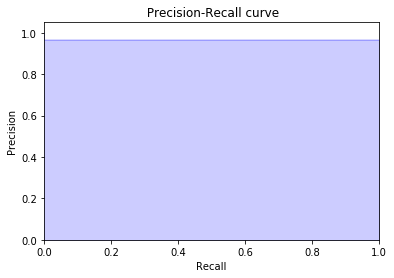

In [52]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Precision-Recall curve')